In [1]:
from saris.utils import utils
import os

import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["TF_GPU_ALLOCATOR"] = "cuda_malloc_async"  # to avoid memory fragmentation
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import tensorflow as tf
policy = tf.keras.mixed_precision.Policy("mixed_bfloat16")
tf.keras.mixed_precision.set_global_policy(policy)
tf.config.experimental.set_memory_growth(
    tf.config.experimental.list_physical_devices("GPU")[0], True
)
tf.random.set_seed(0)

from saris import sigmap
import math
import numpy as np

In [2]:
sionna_config_file = '/home/hieule/research/saris/configs/sionna_L_multi_users.yaml'
sionna_config = utils.load_config(sionna_config_file)

In [3]:
compute_scene_path = "/home/hieule/research/saris/local_assets/blender/hallway_L_0/ceiling_idx/hallway.xml"
viz_scene_path = "/home/hieule/research/saris/local_assets/blender/hallway_L_0/idx/hallway.xml"

sionna_config['cam_look_at'] = [0.0, 0.0, 0.0]
sionna_config['cam_position'] = [0.0, 0.01, 50.0]

ris_pos: [2.0, -3.8, 2.3]
tx_pos: [1.0, 0.0, 2.5]


Renderer(camera=PerspectiveCamera(aspect=1.31, children=(DirectionalLight(intensity=0.25, position=(0.0, 0.0, …

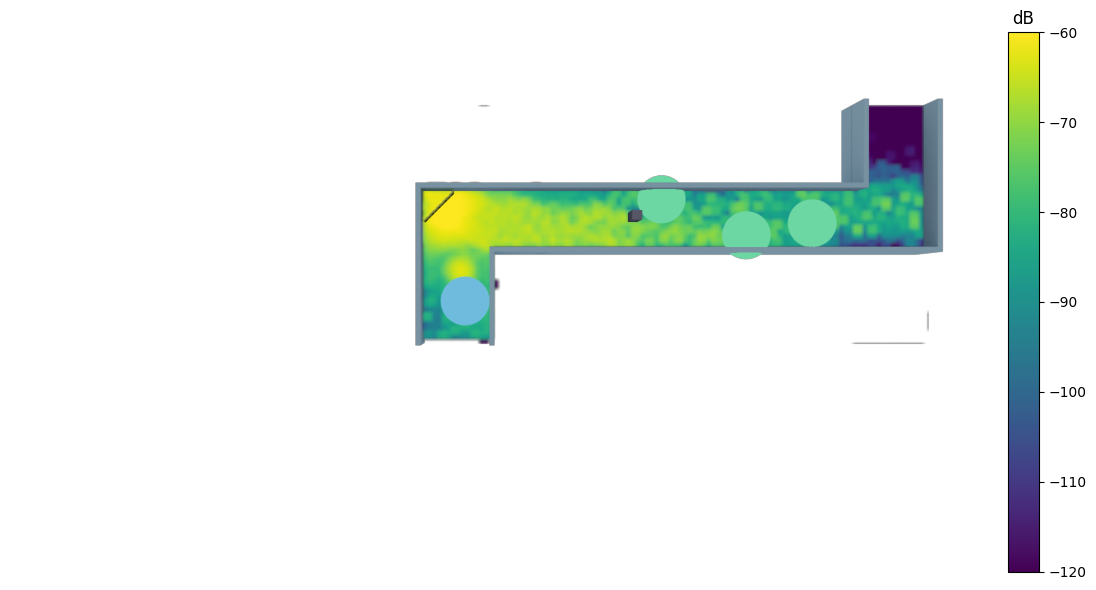

In [4]:
def compute_rot_angle(pt1: list, pt2: list):
    """Compute the rotation angles for vector pt1 to pt2."""
    x = pt2[0] - pt1[0]
    y = pt2[1] - pt1[1]
    z = pt2[2] - pt1[2]

    return cartesian2spherical(x, y, z)


def cartesian2spherical(x: float, y: float, z: float):
    r = math.sqrt(x**2 + y**2 + z**2)
    theta = math.atan2(y, x)
    phi = math.acos(z / r)
    return r, theta, phi


def spherical2cartesian(r: float, theta: float, phi: float):
    x = r * math.sin(phi) * math.cos(theta)
    y = r * math.sin(phi) * math.sin(theta)
    z = r * math.cos(phi)
    return x, y, z


ris_pos = sionna_config['ris_positions'][0]
tx_pos = sionna_config['tx_positions'][0]

print(f"ris_pos: {ris_pos}")
print(f"tx_pos: {tx_pos}")

r, theta, phi = compute_rot_angle(tx_pos, ris_pos)


sionna_config['tx_orientations'] = [[theta, math.pi/2 - phi, 0.0]]
sig_cmap = sigmap.engine.SignalCoverageMap(
    sionna_config, compute_scene_path, viz_scene_path
)
coverage_map = sig_cmap.compute_cmap()
scene = sig_cmap.render(coverage_map)
scene.preview(show_orientations=True)

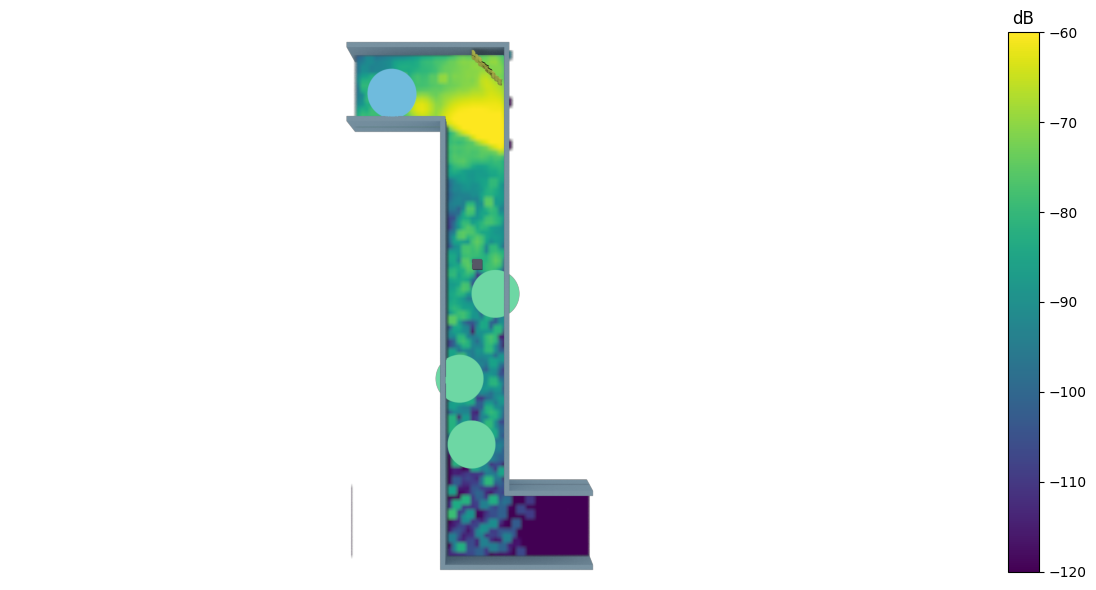

In [7]:
sionna_config['tx_orientations'] = [[-115.0, 0.0, 0.0]]
sig_cmap = sigmap.engine.SignalCoverageMap(
    sionna_config, compute_scene_path, viz_scene_path
)
coverage_map = sig_cmap.compute_cmap()
sig_cmap.render(coverage_map)

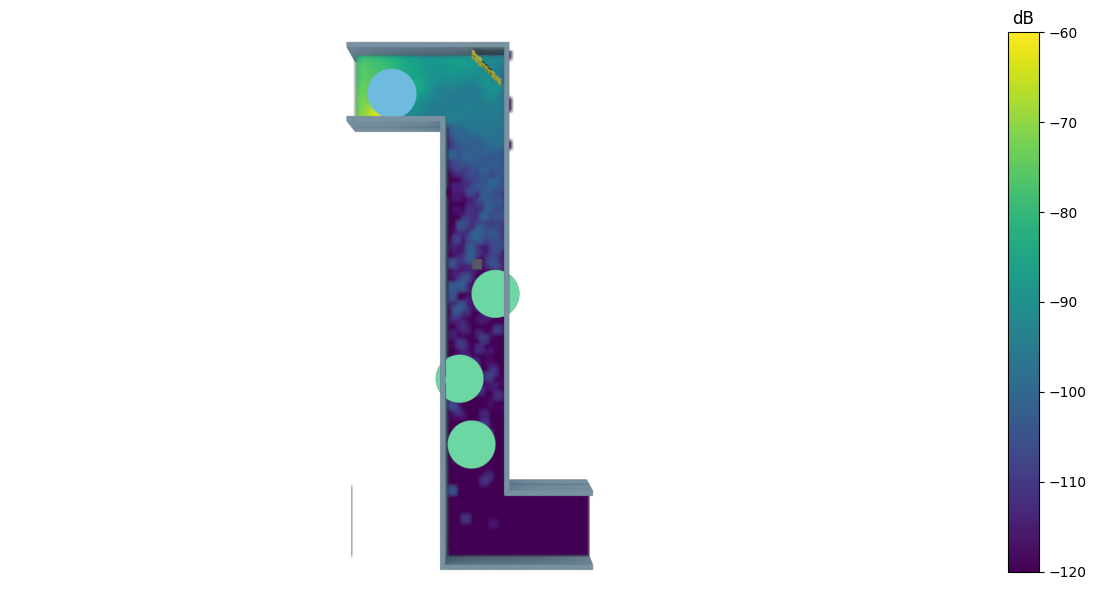

In [8]:
sionna_config['tx_orientations'] = [[-180.0, 0.0, 0.0]]
sig_cmap = sigmap.engine.SignalCoverageMap(
    sionna_config, compute_scene_path, viz_scene_path
)
coverage_map = sig_cmap.compute_cmap()
sig_cmap.render(coverage_map)